## **ALIGN GUARD INTERNSHIP TASK**

**Inertia Sensors for Human Activity Recognition**

* Created By : Blessy louis
* Email: blessylouis2002@gmail.com
* Created On: 30.05.2024



---



**Import Libraries**

In [ ]:
!pip install polars

In [ ]:
import polars as pl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



The dataset for Inertia Sensors for Human Activity Recognition in specific to cycling captures various inertial sensor readings along with time-based features. Here is a detailed description of the features provided in the dataset:

### Features Description:

1. **ACCELEROMETER X (m/s²)**:
   - **Description**: Measures acceleration along the X-axis in meters per second squared (m/s²).
   - **Typical Range**: The values typically range depending on the motion dynamics and the orientation of the sensor.

2. **ACCELEROMETER Y (m/s²)**:
   - **Description**: Measures acceleration along the Y-axis in meters per second squared (m/s²).
   - **Typical Range**: Similar to the X-axis, the range varies with the cycling dynamics.

3. **ACCELEROMETER Z (m/s²)**:
   - **Description**: Measures acceleration along the Z-axis in meters per second squared (m/s²).
   - **Typical Range**: Values change based on the vertical movements and gravity.

4. **GRAVITY X (m/s²)**:
   - **Description**: Measures the gravitational component along the X-axis in meters per second squared (m/s²).
   - **Typical Range**: Generally ranges from -9.8 to 9.8 m/s², depending on the sensor orientation.

5. **GRAVITY Y (m/s²)**:
   - **Description**: Measures the gravitational component along the Y-axis in meters per second squared (m/s²).
   - **Typical Range**: Similar to the X-axis, typically ranges within the gravitational acceleration limits.

6. **GRAVITY Z (m/s²)**:
   - **Description**: Measures the gravitational component along the Z-axis in meters per second squared (m/s²).
   - **Typical Range**: Around -9.8 m/s² (aligned with gravity) to 9.8 m/s² (opposite to gravity).

7. **LINEAR ACCELERATION X (m/s²)**:
   - **Description**: Measures the linear acceleration (acceleration without gravity) along the X-axis in meters per second squared (m/s²).
   - **Typical Range**: Values depend on the specific cycling movements.

8. **LINEAR ACCELERATION Y (m/s²)**:
   - **Description**: Measures the linear acceleration along the Y-axis in meters per second squared (m/s²).
   - **Typical Range**: Reflects horizontal acceleration due to pedaling and turning.

9. **LINEAR ACCELERATION Z (m/s²)**:
   - **Description**: Measures the linear acceleration along the Z-axis in meters per second squared (m/s²).
   - **Typical Range**: Indicates vertical acceleration, useful for detecting jumps or bumps.

10. **GYROSCOPE X (rad/s)**:
    - **Description**: Measures angular velocity around the X-axis in radians per second (rad/s).
    - **Typical Range**: Values can range widely based on the rotational speed of the cyclist.

11. **GYROSCOPE Y (rad/s)**:
    - **Description**: Measures angular velocity around the Y-axis in radians per second (rad/s).
    - **Typical Range**: Indicates rotational movements related to leaning or swaying.

12. **GYROSCOPE Z (rad/s)**:
    - **Description**: Measures angular velocity around the Z-axis in radians per second (rad/s).
    - **Typical Range**: Reflects yaw movements (turning left or right).

13. **Time since start in ms**:
    - **Description**: Represents the elapsed time since the start of the recording in milliseconds.
    - **Typical Range**: Starts from 0 and increments with each data sample.

14. **YYYY-MO-DD HH-MI-SS_SSS**:
    - **Description**: Timestamp of the data sample in the format year-month-day hour-minute-second-millisecond.
    - **Typical Range**: Varies based on the actual recording time, providing the exact time each sample was captured.


**Load dataset**

In [ ]:
df=pl.read_csv('Cycling.csv')

Compare Load Time complexities of  Polars Vs Pandas

In [ ]:
import time

# Measure time to load with pandas
start_time = time.time()
df_pandas = pd.read_csv('Cycling.csv')
pandas_load_time = time.time() - start_time
print(f"Time taken to load with pandas: {pandas_load_time:.4f} seconds")

# Measure time to load with polars
start_time = time.time()
df_polars = pl.read_csv('Cycling.csv')
polars_load_time = time.time() - start_time
print(f"Time taken to load with polars: {polars_load_time:.4f} seconds")

# Verify the DataFrame types
print(f"Type of pandas DataFrame: {type(df_pandas)}")
print(f"Type of polars DataFrame: {type(df_polars)}")

Time taken to load with pandas: 0.0199 seconds
Time taken to load with polars: 0.0075 seconds
Type of pandas DataFrame: <class 'pandas.core.frame.DataFrame'>
Type of polars DataFrame: <class 'polars.dataframe.frame.DataFrame'>


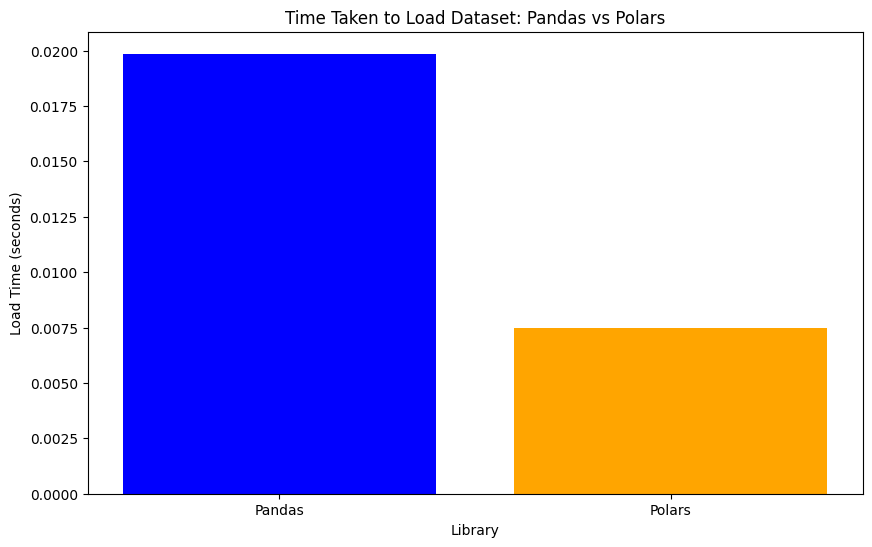

In [ ]:
libraries = ['Pandas', 'Polars']
load_times = [pandas_load_time, polars_load_time]

# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(libraries, load_times, color=['blue', 'orange'])
plt.title('Time Taken to Load Dataset: Pandas vs Polars')
plt.xlabel('Library')
plt.ylabel('Load Time (seconds)')
plt.show()

**EDA**

In [ ]:
df.head()

ACCELEROMETER X (m/s²),ACCELEROMETER Y (m/s²),ACCELEROMETER Z (m/s²),GRAVITY X (m/s²),GRAVITY Y (m/s²),GRAVITY Z (m/s²),LINEAR ACCELERATION X (m/s²),LINEAR ACCELERATION Y (m/s²),LINEAR ACCELERATION Z (m/s²),GYROSCOPE X (rad/s),GYROSCOPE Y (rad/s),GYROSCOPE Z (rad/s),Time since start in ms,YYYY-MO-DD HH-MI-SS_SSS
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,str
-0.8857,-0.915,9.5503,-1.1034,-0.0603,9.7442,-0.6645,0.8831,0.6781,-1.0842,-1.7585,0.1958,8,"""2021-03-19 12:…"
-0.8139,1.2541,9.4306,-0.5532,1.0615,9.7333,-1.8757,0.1955,-0.1211,0.2783,-0.5358,1.6936,508,"""2021-03-19 12:…"
-10.2466,-11.1079,16.061,0.9801,6.8492,-6.9497,4.7212,-7.9441,-9.0559,-1.0009,-2.9897,-6.4581,1007,"""2021-03-19 12:…"
-4.3679,-7.6616,-4.618,3.5523,-8.1039,-4.2283,2.8049,-3.7581,-7.1497,0.0703,-0.1928,-0.358,1508,"""2021-03-19 12:…"
5.0936,-7.1863,-5.2249,4.002,-8.0153,-3.9886,5.1214,-3.4253,3.998,-0.4245,0.0546,0.3329,2008,"""2021-03-19 12:…"


In [ ]:
df.shape

(6764, 14)

In [ ]:
df.columns

['ACCELEROMETER X (m/s²)',
 'ACCELEROMETER Y (m/s²)',
 'ACCELEROMETER Z (m/s²)',
 'GRAVITY X (m/s²)',
 'GRAVITY Y (m/s²)',
 'GRAVITY Z (m/s²)',
 'LINEAR ACCELERATION X (m/s²)',
 'LINEAR ACCELERATION Y (m/s²)',
 'LINEAR ACCELERATION Z (m/s²)',
 'GYROSCOPE X (rad/s)',
 'GYROSCOPE Y (rad/s)',
 'GYROSCOPE Z (rad/s)',
 'Time since start in ms ',
 'YYYY-MO-DD HH-MI-SS_SSS']

In [ ]:
df.schema

OrderedDict([('ACCELEROMETER X (m/s²)', Float64),
             ('ACCELEROMETER Y (m/s²)', Float64),
             ('ACCELEROMETER Z (m/s²)', Float64),
             ('GRAVITY X (m/s²)', Float64),
             ('GRAVITY Y (m/s²)', Float64),
             ('GRAVITY Z (m/s²)', Float64),
             ('LINEAR ACCELERATION X (m/s²)', Float64),
             ('LINEAR ACCELERATION Y (m/s²)', Float64),
             ('LINEAR ACCELERATION Z (m/s²)', Float64),
             ('GYROSCOPE X (rad/s)', Float64),
             ('GYROSCOPE Y (rad/s)', Float64),
             ('GYROSCOPE Z (rad/s)', Float64),
             ('Time since start in ms ', Int64),
             ('YYYY-MO-DD HH-MI-SS_SSS', Utf8)])

In [ ]:
df.dtypes

[Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Int64,
 Utf8]

In [ ]:
df.describe()

describe,ACCELEROMETER X (m/s²),ACCELEROMETER Y (m/s²),ACCELEROMETER Z (m/s²),GRAVITY X (m/s²),GRAVITY Y (m/s²),GRAVITY Z (m/s²),LINEAR ACCELERATION X (m/s²),LINEAR ACCELERATION Y (m/s²),LINEAR ACCELERATION Z (m/s²),GYROSCOPE X (rad/s),GYROSCOPE Y (rad/s),GYROSCOPE Z (rad/s),Time since start in ms,YYYY-MO-DD HH-MI-SS_SSS
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str
"""count""",6764.0,6764.0,6764.0,6764.0,6764.0,6764.0,6764.0,6764.0,6764.0,6764.0,6764.0,6764.0,6764.0,"""6764"""
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""0"""
"""mean""",-2.089044,0.603412,-3.398616,-2.143309,0.639125,-3.493047,0.075916,-0.122222,0.024642,0.017998,-0.004245,0.067216,333316.472206,null
"""std""",6.171541,7.283687,3.725064,5.352271,6.324932,3.213454,3.112423,2.685806,2.135443,1.052969,0.632041,1.300146,210014.382613,null
"""min""",-25.096,-43.8652,-32.346,-9.478,-9.8037,-9.7918,-23.488,-22.5195,-26.789,-6.5252,-9.668,-6.718,8.0,"""2021-03-19 12:…"
"""25%""",-6.481,-5.8899,-4.987,-6.839,-5.5608,-5.8779,-1.301,-1.353,-0.8103,-0.331,-0.32,-0.3654,166300.0,null
"""50%""",-2.5292,0.395,-2.5738,-2.5696,1.2007,-2.539,0.0396,-0.039,-0.0434,0.0138,0.0116,0.009,305817.0,null
"""75%""",0.9589,7.07,-1.137,0.5782,6.541,-1.191,1.378,1.2187,0.769,0.341,0.341,0.5053,498532.0,null
"""max""",33.6936,31.52,16.061,9.7076,9.806,9.7734,27.4622,21.425,27.8737,6.888,4.578,4.855,782932.0,"""2021-05-19 18:…"


In [ ]:
df.null_count()

ACCELEROMETER X (m/s²),ACCELEROMETER Y (m/s²),ACCELEROMETER Z (m/s²),GRAVITY X (m/s²),GRAVITY Y (m/s²),GRAVITY Z (m/s²),LINEAR ACCELERATION X (m/s²),LINEAR ACCELERATION Y (m/s²),LINEAR ACCELERATION Z (m/s²),GYROSCOPE X (rad/s),GYROSCOPE Y (rad/s),GYROSCOPE Z (rad/s),Time since start in ms,YYYY-MO-DD HH-MI-SS_SSS
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Visualizations

In [ ]:
accelerometer_df = df.select(df.columns[0:3])  # Assuming accelerometer columns are the first three columns
gravity_df = df.select(df.columns[3:6])       # Assuming gravity columns are the next three columns
linear_acceleration_df = df.select(df.columns[6:9])  # Assuming linear acceleration columns are the next three columns
gyroscope_df = df.select(df.columns[9:12])

In [ ]:
def plot_histograms(df, title):
    df_pd = df.to_pandas()
    df_pd.hist(bins=50, figsize=(12, 8))
    plt.tight_layout()
    plt.suptitle(title)
    plt.show()

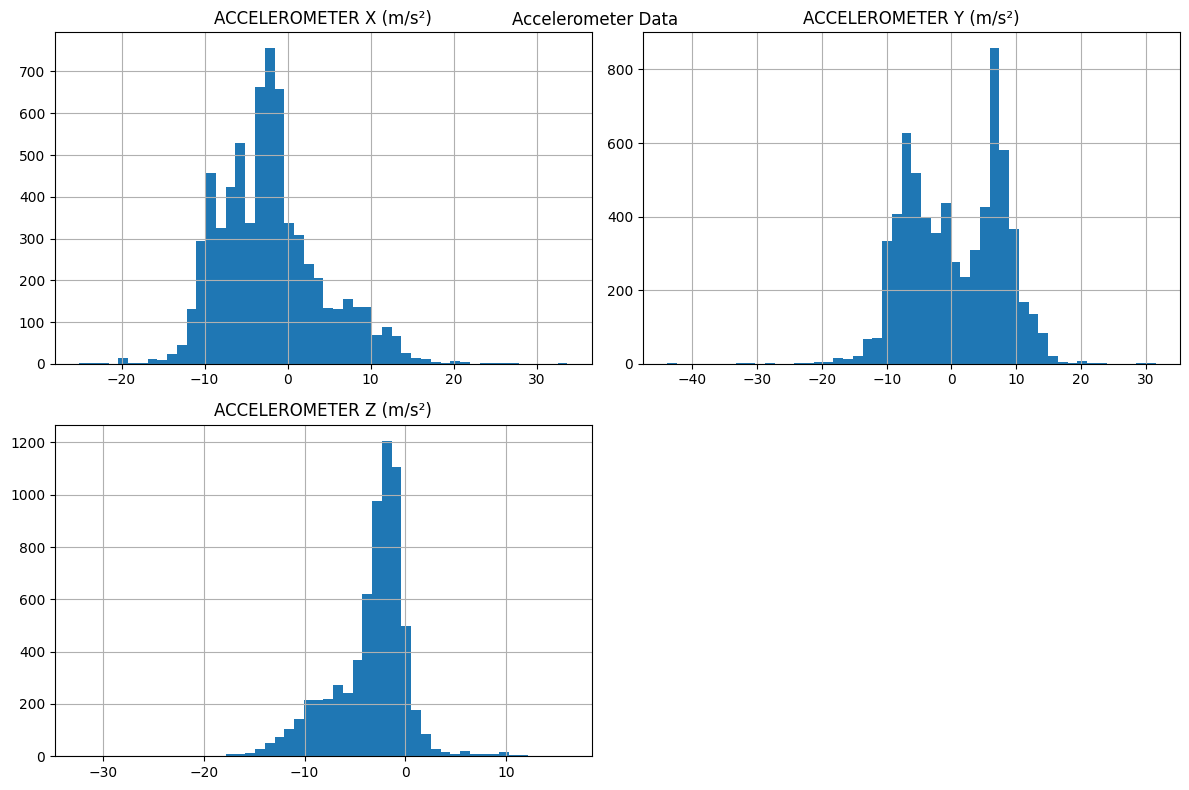

In [ ]:
plot_histograms(accelerometer_df, 'Accelerometer Data')





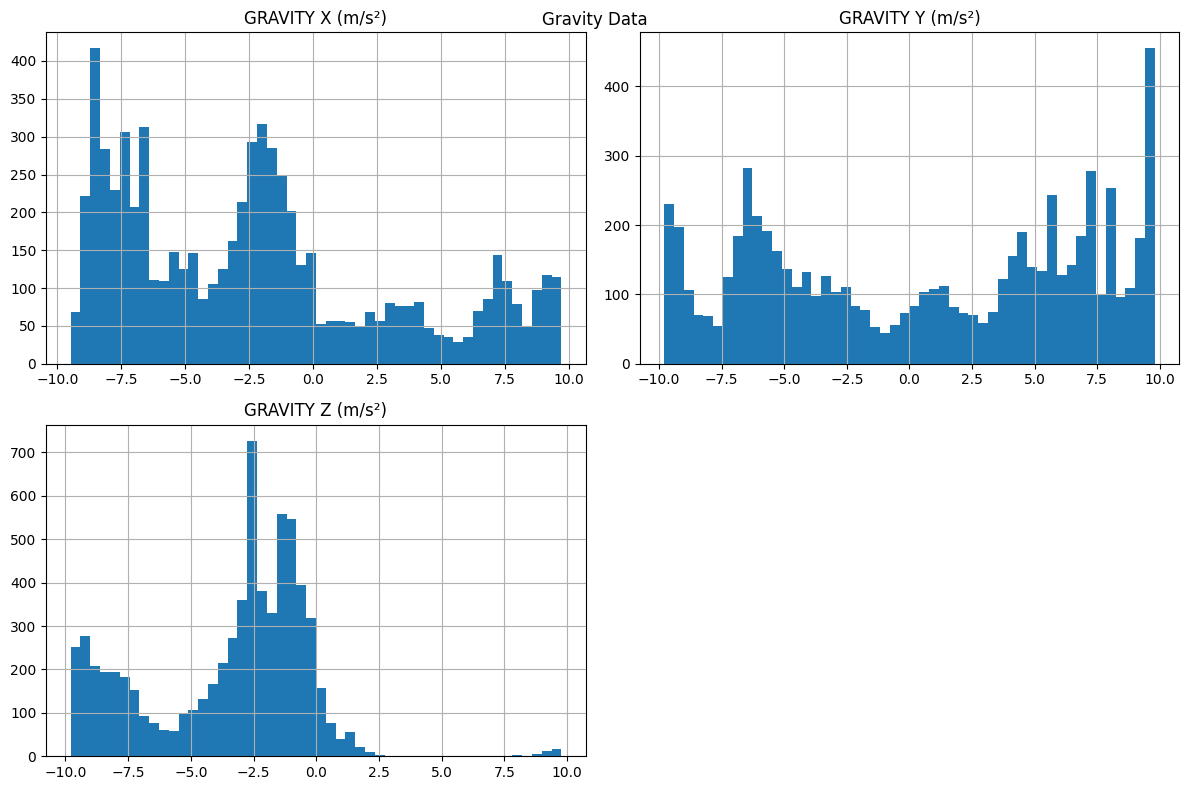

In [ ]:
# Visualize Gravity data
plot_histograms(gravity_df, 'Gravity Data')

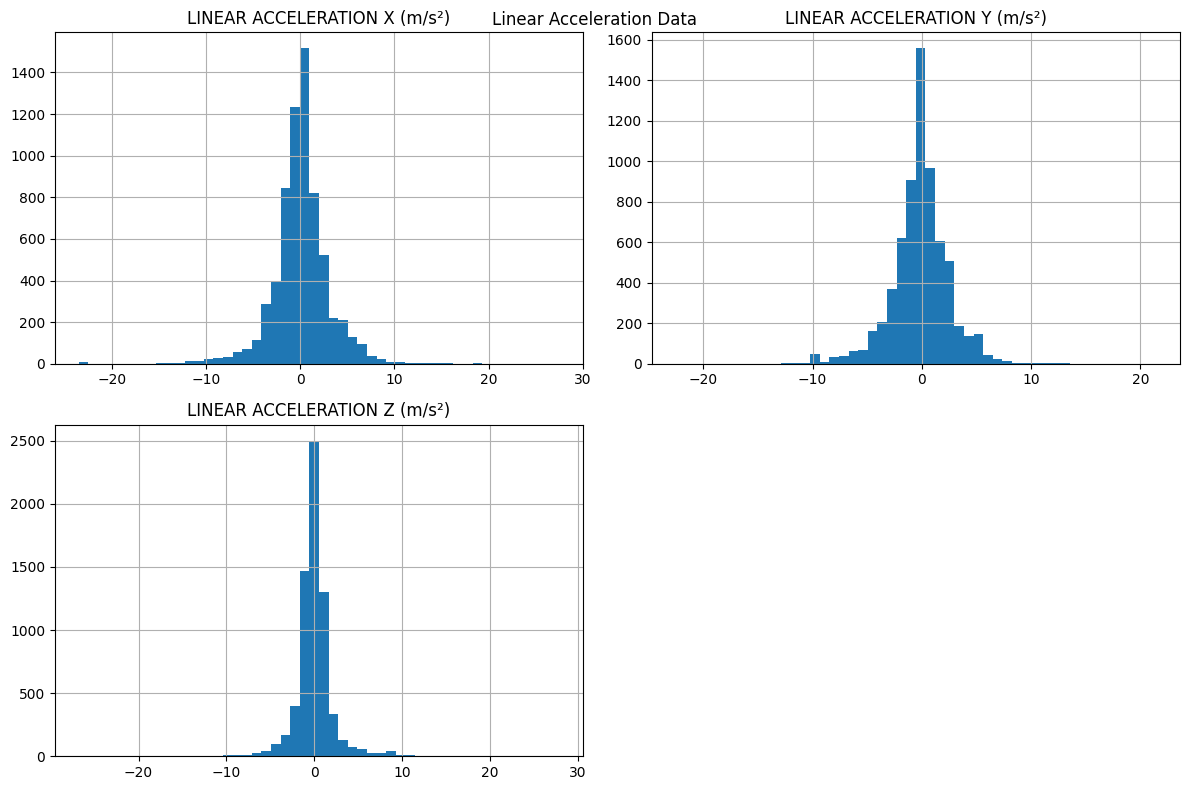

In [ ]:

# Visualize Linear Acceleration data
plot_histograms(linear_acceleration_df, 'Linear Acceleration Data')

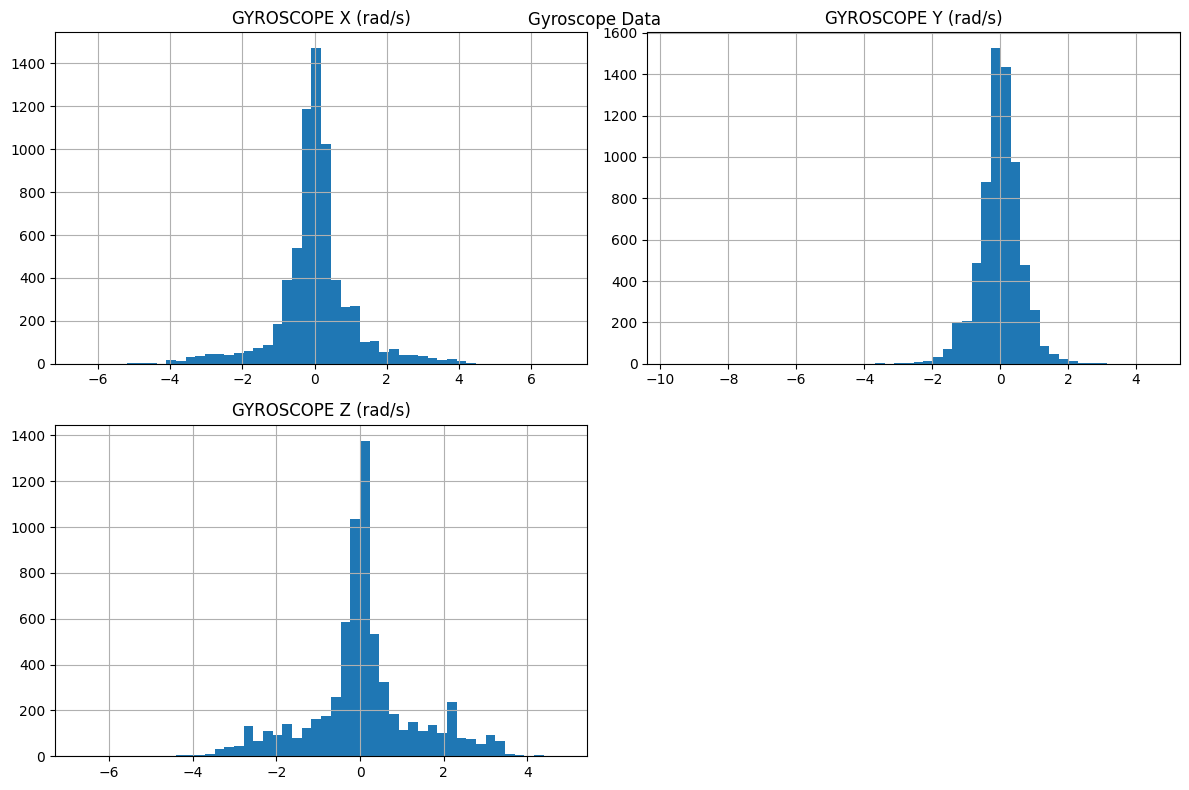

In [ ]:

# Visualize Gyroscope data
plot_histograms(gyroscope_df, 'Gyroscope Data')

shape: (5, 1)
┌─────────────────────────┐
│ Time since start in ms  │
│ ---                     │
│ i64                     │
╞═════════════════════════╡
│ 8                       │
│ 508                     │
│ 1007                    │
│ 1508                    │
│ 2008                    │
└─────────────────────────┘


<ipython-input-26-66fede0a6c9c>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(time_since_start_df, shade=True)


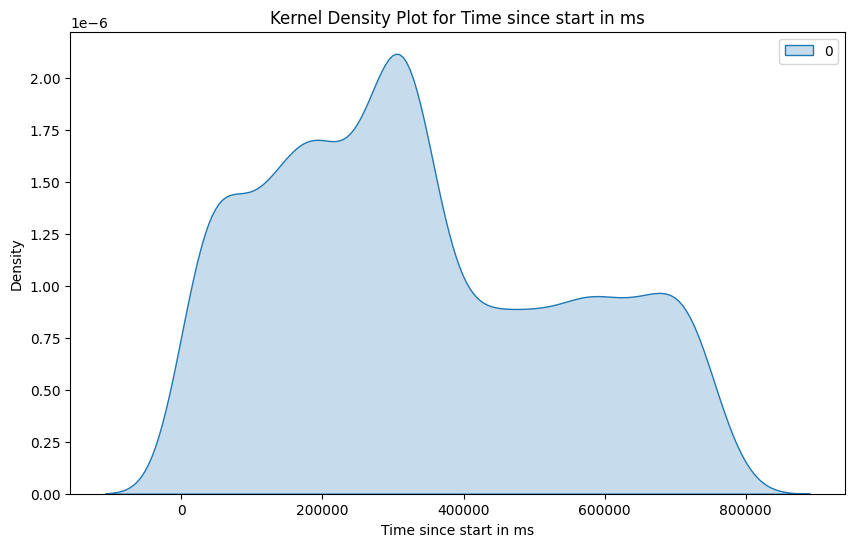

In [ ]:
# Extract the "Time since start in ms" column
time_since_start_df = df.select(df.columns[12])

# Verify the extracted DataFrame
print(time_since_start_df.head())

# Plotting the kernel density plot for the extracted column
plt.figure(figsize=(10, 6))
sns.kdeplot(time_since_start_df, shade=True)
plt.title('Kernel Density Plot for Time since start in ms')
plt.xlabel('Time since start in ms')
plt.ylabel('Density')
plt.show()

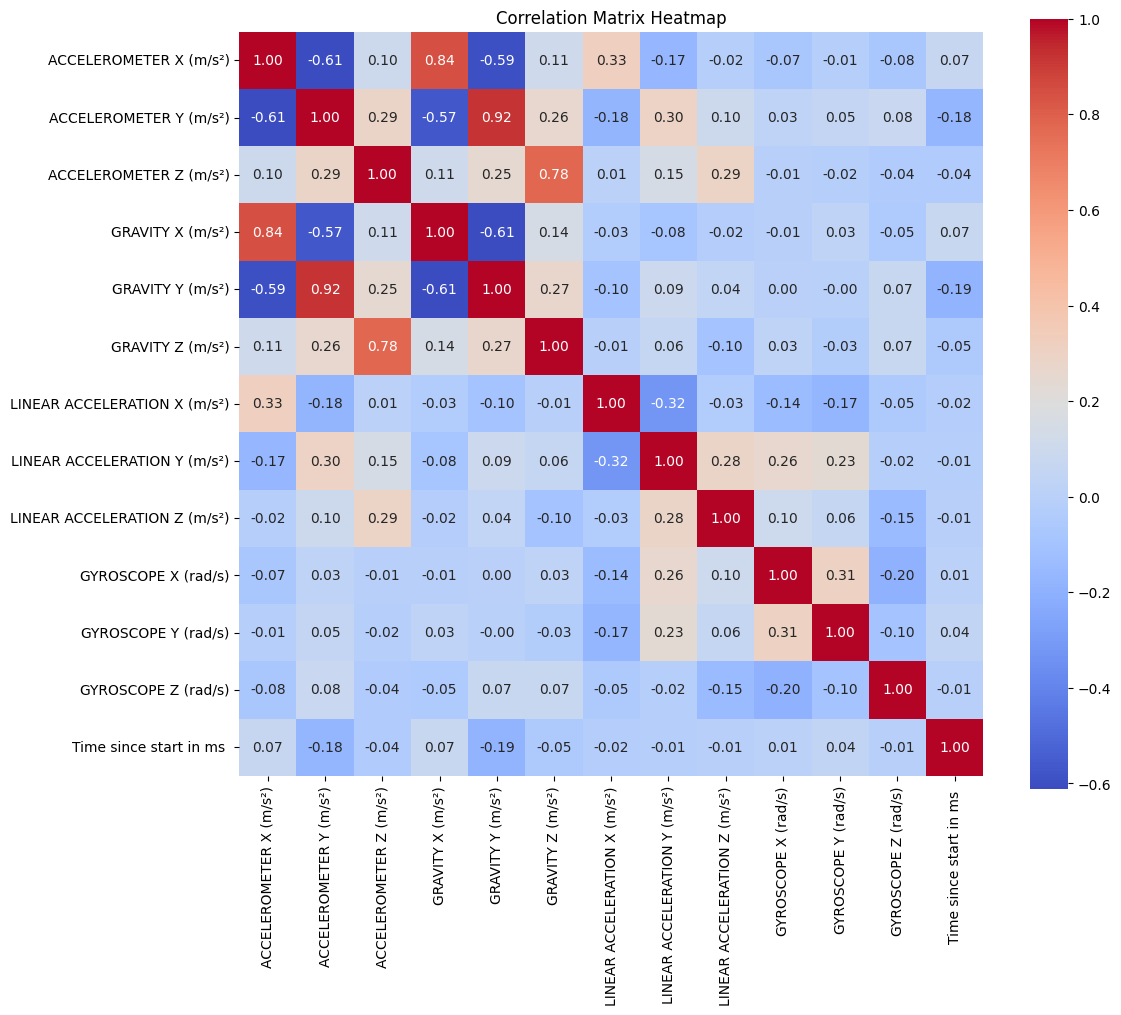

In [ ]:
numeric_columns = [col for col in df.columns if df[col].dtype in [pl.Float64, pl.Int64]]

# Step 3: Filter the DataFrame to keep only numeric columns
numeric_df = df.select(numeric_columns)

# Step 4: Calculate the correlation matrix
correlation_matrix = numeric_df.to_pandas().corr()

# Step 5: Plot the heat map
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

## **PCA**

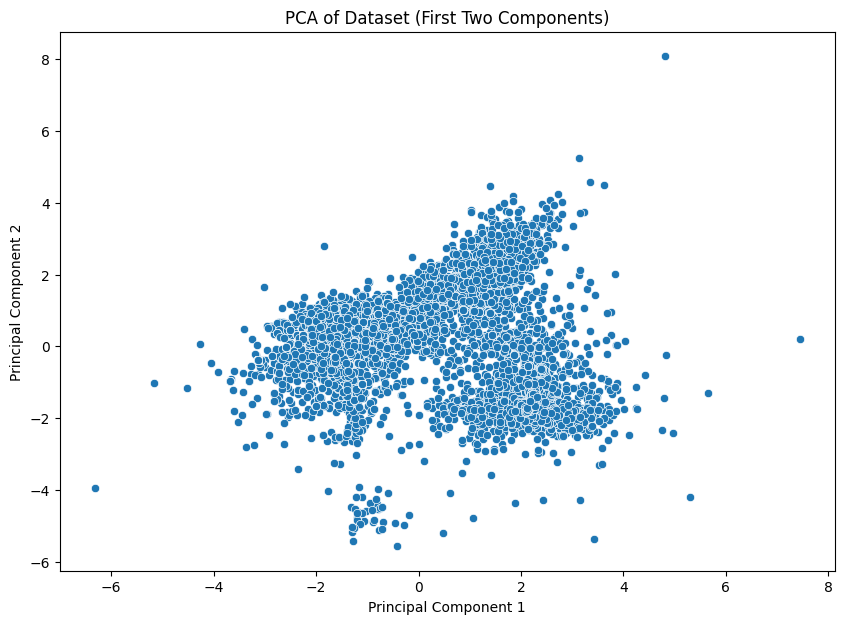

Explained variance ratio by each component: [0.25231507 0.15397521 0.13831505 0.09015148 0.07917154 0.0742865 ]
   Principal Component 1  Principal Component 2  Principal Component 3  \
0              -0.790738              -4.522046               3.032919   
1              -1.176968              -4.616408               1.948234   
2               0.830577              -1.007940               4.857223   
3               2.118099               1.061355               1.478228   
4               2.488124              -0.332085               0.518947   

   Principal Component 4  Principal Component 5  Principal Component 6  
0               0.043660              -0.930807              -0.926466  
1               1.274599               0.242023              -1.031218  
2              -3.354724               2.753430               0.591216  
3               0.781071               2.650261              -1.183529  
4              -1.772760              -0.470142              -1.661061  


In [ ]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
numeric_columns = [col for col in df.columns if df[col].dtype in [pl.Float64, pl.Int64]]
numeric_df = df.select(numeric_columns)

# Step 3: Standardize the data
# Convert Polars DataFrame to Pandas DataFrame for compatibility with Scikit-learn
numeric_df_pd = numeric_df.to_pandas()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df_pd)

# Step 4: Apply PCA
pca = PCA(n_components=6)  # Reduce to 6 principal components
pca_result = pca.fit_transform(scaled_data)

# Step 5: Create a DataFrame for PCA results
pca_columns = [f'Principal Component {i+1}' for i in range(6)]
pca_df = pd.DataFrame(data=pca_result, columns=pca_columns)

# Step 6: Visualize the PCA results (First two components for simplicity)
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', data=pca_df)
plt.title('PCA of Dataset (First Two Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Optional: Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance ratio by each component: {explained_variance}')

# Show the PCA DataFrame with 6 components
print(pca_df.head())

<ipython-input-19-06f9fa439b6c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[f'PC {i+1}' for i in range(6)], y=explained_variance, palette='viridis')


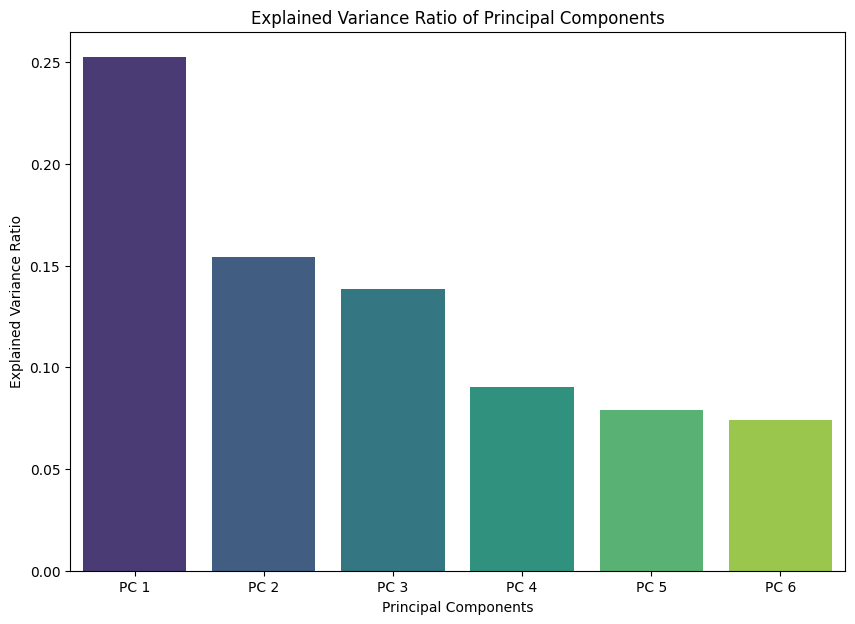

In [ ]:
plt.figure(figsize=(10, 7))
sns.barplot(x=[f'PC {i+1}' for i in range(6)], y=explained_variance, palette='viridis')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components')
plt.show()